In [93]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

In [94]:
traffic_raw = []
#Set up the api url and parameters


In [95]:
r = requests.get("https://data.austintexas.gov/resource/dx9v-zd7x.json", params = {
                "$limit": 300000,
                "$offset": 0
                })
if r.status_code == 200:     
        traffic_raw = r.json()
        #print("Record Start = " + str(offset) + "Pagination is " + str(increment))
        #offset += increment
        
else:
    print("***** IT IS BROKEN *****")
    print(r.status_code)

In [96]:
pd.DataFrame(traffic_raw)

,traffic_report_id,published_date,issue_reported,location,latitude,longitude,address,traffic_report_status,traffic_report_status_date_time
0,EBF5283D22437BB974F4248BA0EC4E90F26D32CB_15201...,2018-03-04T08:36:00.000Z,LOOSE LIVESTOCK,"(30.256997,-97.611818)",30.256997,-97.611818,N Fm 973 Rd & Fm 969 Rd,ARCHIVED,1970-01-18T14:16:00.000Z
1,9AE17B153A32567D1646CAA8C4010174C30AC349_15088...,2017-10-24T15:48:00.000Z,Crash Urgent,"(30.415159,-97.688372)",30.415159,-97.688372,12700 Metric Blvd,ARCHIVED,2017-10-24T15:51:00.000Z
2,A6990ED96E2C5ACAC92ACDCC3F83BA4E2893AD76_15088...,2017-10-24T15:49:00.000Z,Traffic Hazard,"(30.224758,-97.766467)",30.224758,-97.766467,300 W Ben White Blvd Wb,ARCHIVED,2017-10-24T15:51:00.000Z
3,551220DEEB362077F5DF356BDEBAF94F34F93F0C_15088...,2017-10-24T15:49:00.000Z,Crash Urgent,"(30.275603,-97.734873)",30.275603,-97.734873,E 15th St & Red River St,ARCHIVED,2017-10-24T15:51:00.000Z
4,0200320AE3BC247E747EF93E3259BC29DDF53392_15088...,2017-10-24T15:48:00.000Z,Crash Urgent,"(30.288241,-97.741506)",30.288241,-97.741506,2414 Guadalupe St,ARCHIVED,2017-10-24T15:51:00.000Z
...,...,...,...,...,...,...,...,...,...
158171,055550DAD2FD7BB5AEE434F17CA74CA072982AC1_15793...,2020-01-17T22:55:53.000Z,zSTALLED VEHICLE,"(30.334973,-97.691473)",30.334973,-97.691473,1212 E Anderson Ln Wb,ACTIVE,2020-01-17T23:00:07.000Z
158172,6341E003520BC779C996D2490305A597FF45A8AE_15793...,2020-01-17T22:55:11.000Z,Traffic Hazard,"(30.227462,-97.727776)",30.227462,-97.727776,E Oltorf St & S Pleasant Valley Rd,ACTIVE,2020-01-17T23:00:07.000Z
158173,9D65C4A27A601E62A599F3059159476CD76933A4_15793...,2020-01-17T22:54:21.000Z,Traffic Hazard,"(30.48005,-97.801956)",30.48005,-97.801956,N 183a Hwy Svrd Nb & Lakeline Blvd,ACTIVE,2020-01-17T23:00:07.000Z
158174,FF33A8F10515011CBA0D191AE58F7F9A4DD7A3E1_15792...,2020-01-17T21:21:41.000Z,Crash Service,"(30.403691,-97.854068)",30.403691,-97.854068,0 Fm 2222 Rd & N Fm 620 Rd,ARCHIVED,2020-01-17T23:05:03.000Z


In [100]:
#Munge the json output that was converted to a data frame
traffic_incidents_hour = [{
    "ReportID": rec["traffic_report_id"],
    "IncidentDesc": rec["issue_reported"],
    "Address": str(rec["address"]).upper(),
#    "Address": rec["address"],
    "IncidentDate": rec["traffic_report_status_date_time"]
#    "Year": pd.to_datetime(rec["traffic_report_status_date_time"]).strftime("%Y"),
#    "Hour": pd.to_datetime(rec["traffic_report_status_date_time"]).hour
} for rec in traffic_raw]
#Convert back to data frame
td = pd.DataFrame(traffic_incidents_hour)
td

,ReportID,IncidentDesc,Address,IncidentDate
0,EBF5283D22437BB974F4248BA0EC4E90F26D32CB_15201...,LOOSE LIVESTOCK,N FM 973 RD & FM 969 RD,1970-01-18T14:16:00.000Z
1,9AE17B153A32567D1646CAA8C4010174C30AC349_15088...,Crash Urgent,12700 METRIC BLVD,2017-10-24T15:51:00.000Z
2,A6990ED96E2C5ACAC92ACDCC3F83BA4E2893AD76_15088...,Traffic Hazard,300 W BEN WHITE BLVD WB,2017-10-24T15:51:00.000Z
3,551220DEEB362077F5DF356BDEBAF94F34F93F0C_15088...,Crash Urgent,E 15TH ST & RED RIVER ST,2017-10-24T15:51:00.000Z
4,0200320AE3BC247E747EF93E3259BC29DDF53392_15088...,Crash Urgent,2414 GUADALUPE ST,2017-10-24T15:51:00.000Z
...,...,...,...,...
158171,055550DAD2FD7BB5AEE434F17CA74CA072982AC1_15793...,zSTALLED VEHICLE,1212 E ANDERSON LN WB,2020-01-17T23:00:07.000Z
158172,6341E003520BC779C996D2490305A597FF45A8AE_15793...,Traffic Hazard,E OLTORF ST & S PLEASANT VALLEY RD,2020-01-17T23:00:07.000Z
158173,9D65C4A27A601E62A599F3059159476CD76933A4_15793...,Traffic Hazard,N 183A HWY SVRD NB & LAKELINE BLVD,2020-01-17T23:00:07.000Z
158174,FF33A8F10515011CBA0D191AE58F7F9A4DD7A3E1_15792...,Crash Service,0 FM 2222 RD & N FM 620 RD,2020-01-17T23:05:03.000Z


In [104]:
pattern = ("(LAMAR)")
td["hwy"] = ti_h["Address"].str.extract(pattern, expand = True)
td["RecordDate"] = td["IncidentDate"].str.extract("(\d+-\d+-\d+)", expand = True)
filtered_df = td[td.hwy.notnull()]

In [105]:
filtered_df

#filtered_df= filtered_df[filtered_df.Year.isin(["2017","2018","2019"])]

,ReportID,IncidentDesc,Address,IncidentDate,hwy,RecordDate
108,F594216AB73D45120DC603E926DA86C1AE918428_15089...,Crash Urgent,N LAMAR BLVD & W ST JOHNS AVE,2017-10-25T12:15:00.000Z,LAMAR,2017-10-25
128,BE2608CD9B0E64302FCB6170D889D6A11E1EBDD7_15089...,Crash Urgent,N LAMAR BLVD & W BRAKER LN,2017-10-25T13:40:00.000Z,LAMAR,2017-10-25
148,B37376966AC6D8C371B3A1D74862360FE5710E1C_15089...,Crash Service,2108 S LAMAR BLVD,2017-10-25T15:00:00.000Z,LAMAR,2017-10-25
149,869655D8ABDC71EBDF8A999DE0B7E85B1FA69D28_15089...,Crash Service,12430 N LAMAR BLVD,2017-10-25T15:00:00.000Z,LAMAR,2017-10-25
183,C71CC62930CF523FCF54EFD029485F66FA5D839A_15089...,Crash Service,9504 N LAMAR BLVD,2017-10-25T16:45:00.000Z,LAMAR,2017-10-25
...,...,...,...,...,...,...
157988,3CD969896E49A6D3326ACF33F0C2D8CC38B0D06A_15792...,Crash Urgent,218 S LAMAR BLVD SB,2020-01-17T02:50:04.000Z,LAMAR,2020-01-17
157998,FC27FBAE8511B00B820DA34FD107D27B11A72855_15792...,Crash Urgent,11100-11223 N LAMAR BLVD,2020-01-17T03:20:05.000Z,LAMAR,2020-01-17
158019,60EDEDC2F0013288E1BC81C585F0240B1762D22E_15792...,Traffic Hazard,W 45TH ST & N LAMAR BLVD,2020-01-17T06:25:04.000Z,LAMAR,2020-01-17
158108,09F8DF3C750BF6D2D367D1934CF0488F4576DBCD_15792...,Crash Urgent,W MARY ST & S LAMAR BLVD,2020-01-17T19:00:07.000Z,LAMAR,2020-01-17


In [126]:
incident_date = pd.DataFrame(filtered_df.groupby("RecordDate")["ReportID"].count()) \
    .rename(columns={"ReportID" : "Incident Count"})
incident_date


,Incident Count
RecordDate,
2017-10-25,11
2017-10-26,5
2017-10-27,8
2017-10-28,5
2017-10-29,2
...,...
2020-01-13,5
2020-01-14,11
2020-01-15,11


---
# Travel Data
---

In [110]:
bluetooth_raw = []
r = requests.get("https://data.austintexas.gov/resource/x44q-icha.json?$where=origin_reader_identifier like '%amar_%'"
                 , params = {
#                "$limit": 10,
                "$limit": 1000000,
                "$offset": 0
                
                })
if r.status_code == 200:     
        bluetooth_raw = r.json()
        #print("Record Start = " + str(offset) + "Pagination is " + str(increment))
        #offset += increment
        
else:
    print("***** IT IS BROKEN *****")
    print(r.status_code)

In [111]:
travel_data = [{
    "ID": rec["record_id"],
    "Start": rec["origin_reader_identifier"].upper(),
    "Ending": rec["destination_reader_identifier"].upper(),
    "TravelTime": int(rec["travel_time_seconds"]),
    "MPH": int(rec["speed_miles_per_hour"]),
    "StartTime": rec["start_time"],
    "EndTime": rec["end_time"]
#     "Year": pd.to_datetime(rec["traffic_report_status_date_time"]).strftime("%Y"),
#     "Hour": pd.to_datetime(rec["traffic_report_status_date_time"]).hour
} for rec in bluetooth_raw]

In [112]:
tvld = pd.DataFrame(travel_data)
tvld

,ID,Start,Ending,TravelTime,MPH,StartTime,EndTime
0,4c4ad5123091136197626c06b45eafcf,LAMAR_6TH,6TH_CAMPBELL,91,27,2017-09-19T19:34:40,2017-09-19T19:36:12
1,bb6da165bf4586f89d3716eaef9d5e8c,LAMAR_6TH,6TH_CAMPBELL,155,16,2017-09-19T19:39:28,2017-09-19T19:42:04
2,b0a857e2857724a603f9abe8d027f5c1,LAMAR_6TH,6TH_CAMPBELL,98,25,2017-09-19T19:40:19,2017-09-19T19:41:57
3,a97c14836277b91336278b26c8ce36db,LAMAR_6TH,6TH_CAMPBELL,90,27,2017-09-19T19:42:34,2017-09-19T19:44:04
4,1ab88ad4a8716e8ef3ca775d4ae4dfb9,LAMAR_6TH,6TH_CAMPBELL,133,18,2017-09-19T19:45:49,2017-09-19T19:48:01
...,...,...,...,...,...,...,...
999995,4689584588dde02b059eec7a6f0e4f61,LAMAR_38TH,LAMAR_45TH,110,22,2017-10-28T16:24:02,2017-10-28T16:25:52
999996,ebf75d1ca6cd046f9e1dba0c592ef1b5,LAMAR_38TH,LAMAR_45TH,109,22,2017-10-28T16:28:53,2017-10-28T16:30:41
999997,a23c8fa0770ea73b9ec949aba7973c21,LAMAR_38TH,LAMAR_45TH,609,4,2017-10-28T16:21:34,2017-10-28T16:31:42
999998,1a4d319bee128ff2748ae0951e01f5c7,LAMAR_38TH,LAMAR_45TH,96,25,2017-10-28T16:31:03,2017-10-28T16:32:39


In [114]:
tvld["hwy"] = tvld["Ending"].str.extract("(LAMAR)", expand = True)
tvld["RecordDate"] = tvld["StartTime"].str.extract("(\d+-\d+-\d+)", expand = True)
tvld_filtered_df = tvld[tvld.hwy.notnull()]

In [115]:
travel_by_date = pd.DataFrame(tvld_filtered_df.groupby("RecordDate").agg({
                                 "ID" : "count",
                                 "TravelTime" : "mean",
                                 "MPH" : "mean"
                                })).rename(columns={
                                                        "ID" : "Vehicle Count",
                                                        "TravelTime" : "AVG Travel Time",
                                                        "MPH" : "AVG Speed (mph)"
                                                    })
travel_by_date

,Vehicle Count,AVG Travel Time,AVG Speed (mph)
RecordDate,,,
2017-09-18,2,404.500000,17.500000
2017-09-19,26097,167.092003,22.947312
2017-09-20,26493,164.203299,22.878949
2017-09-21,26545,166.829422,22.777887
2017-09-22,27460,172.107101,22.688747
2017-09-23,21492,155.222688,24.476922
2017-09-24,17979,138.937038,26.064965
2017-09-25,25130,159.399363,23.625627
2017-09-26,24398,176.278015,22.072096


In [168]:
# incitent df  = incident_date
# travel df = travel_by_date
#merge two data sets into one data frame
main_df = travel_by_date.join(incident_date).fillna(0)
main_df["Incident Count"] = main_df["Incident Count"].astype("int64")
main_df.head(50)

,Vehicle Count,AVG Travel Time,AVG Speed (mph),Incident Count
RecordDate,,,,
2017-09-18,2,404.500000,17.500000,0
2017-09-19,26097,167.092003,22.947312,0
2017-09-20,26493,164.203299,22.878949,0
2017-09-21,26545,166.829422,22.777887,0
2017-09-22,27460,172.107101,22.688747,0
2017-09-23,21492,155.222688,24.476922,0
2017-09-24,17979,138.937038,26.064965,0
2017-09-25,25130,159.399363,23.625627,0
2017-09-26,24398,176.278015,22.072096,0


In [169]:
incident_impact = pd.DataFrame(main_df.groupby("Incident Count").agg({
                                 "Vehicle Count" : "sum",
                                 "AVG Travel Time" : "mean",
                                 "AVG Speed (mph)" : "mean"
                                }))

In [170]:
incident_impact

,Vehicle Count,AVG Travel Time,AVG Speed (mph)
Incident Count,,,
0,855243,167.645775,23.367490
2,7,212.714286,21.714286
5,26247,128.598308,26.945385
8,26044,167.339003,22.945285
11,25146,165.375209,23.430605


In [171]:
base_time = incident_impact["AVG Travel Time"].mean()
base_speed = incident_impact["AVG Speed (mph)"].mean() 
baseline=pd.DataFrame({
    "Base Time" : [base_time],
    "Base Speed" : [base_speed],

}) 

baseline

,Base Time,Base Speed
0,168.334516,23.68061


In [172]:
incident_impact["Travel_Impact"] =  (((incident_impact["AVG Travel Time"] - incident_impact["AVG Travel Time"].mean()) \
                                     / incident_impact["AVG Travel Time"].mean()) * 100)#.map("{0:.2f}%".format)

incident_impact["Speed_Impact"] =  (((incident_impact["AVG Speed (mph)"] - incident_impact["AVG Speed (mph)"].mean()) \
                                     / incident_impact["AVG Speed (mph)"].mean()) * 100)#.map("{0:.2f}%".format)

In [173]:
incident_impact

,Vehicle Count,AVG Travel Time,AVG Speed (mph),Travel_Impact,Speed_Impact
Incident Count,,,,,
0,855243,167.645775,23.367490,-0.409150,-1.322263
2,7,212.714286,21.714286,26.364034,-8.303521
5,26247,128.598308,26.945385,-23.605502,13.786701
8,26044,167.339003,22.945285,-0.591390,-3.105179
11,25146,165.375209,23.430605,-1.757992,-1.055737


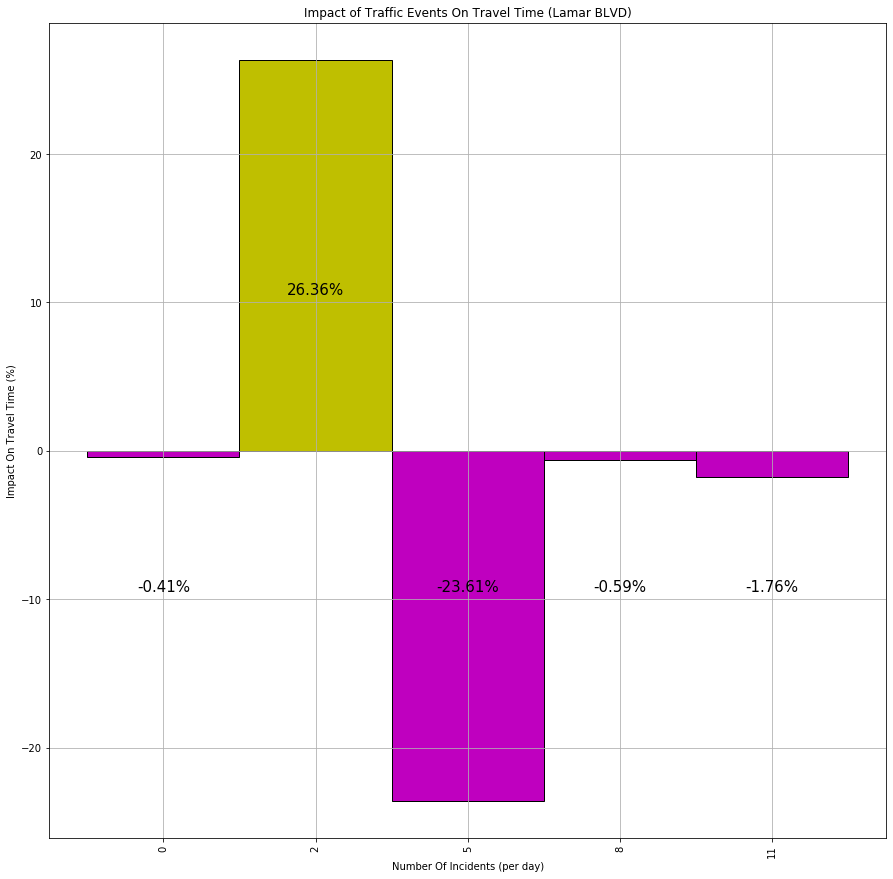

In [178]:
#function to auto label the bars for the plot with the percent value
def autolabel(bars, incident_impactplt):
#loop through the bars in the plot
    for bar in bars:
#store the horizontal position of the label
        x = bar.get_x() + bar.get_width() / 2
#store the value for the label 
        y = bar.get_height()
#if the bar value is successful(negative int) put the label at the -10 position otherwise put label at the 10 position
        if y < 0:
            ylab = -10
        else:
            ylab = 10
#add label for bar
        incident_impactplt.annotate("{0:.2f}%".format(y), (x,(ylab)), xytext = (0,5), textcoords = "offset points",
                    ha ="center", va = "bottom", color = "k", fontsize = 15)
#store the true or false value if the value is less than 0
mask = incident_impact["Travel_Impact"] <= 0
#create numpy array for each bar we are going to plot and store the value "r" for red
colors = np.array(["y"] * len(incident_impact["Travel_Impact"]))
#change the value to "g" where the mask array value matches the colors array
colors[mask.values] = "m"
#plot the data in a bar plot
incident_impactplt = incident_impact["Travel_Impact"].plot.bar(figsize = (15,15),color = colors,width = 1, edgecolor = "k", \
                               title = "Impact of Traffic Events On Travel Time (Lamar BLVD)",  \
                               grid = True)
#run label function
autolabel(incident_impactplt.patches,incident_impactplt)
#add x and y labels to plot
incident_impactplt.set(xlabel = "Number Of Incidents (per day)", ylabel = "Impact On Travel Time (%)")
#plt.savefig("tumor_chg.png")
plt.show()